# Find the Equivalent Ellipse

This notebook makes defines an object class which takes cutout shape defining points as an input along with a user defined cutout factor `circle_fit` function and returns the equivalent ellipse. An example of how to define the `circle_fit` function is given in the [example below](#Defining-the-circle-fit-from-example-measured-factors).

To calculate the equivalent ellipse a seriese of objects are used which can each be found in their own notebook. These are outlined as such:

 * Finding the position of maximum dose output defined in [FindingCentre.ipynb](FindingCentre.ipynb)
   * Which makes use of [SectorIntegration.ipynb](SectorIntegration.ipynb)
 * Cutout straightening defined in [CutoutStraightening.ipynb](CutoutStraightening.ipynb)
 * Ellipse fitting found in [EllipseFitting.ipynb](EllipseFitting.ipynb)
 
An example of using the `equivalent_ellipse` object found within this notebook is given [at the bottom of this notebook](#Example)

## Copyright information

Copyright © 2015 Simon Biggs

This program is free software: you can redistribute it and/or modify it under the terms of the GNU Affero General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version.

This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU Affero General Public License for more details.

You should have received a copy of the GNU Affero General Public License along with this program. If not, see http://www.gnu.org/licenses/.

## Import modules

In [1]:
import numpy as np

from equivalent_ellipse import EquivalentEllipse
# import os, sys
# sys.path.append(os.path.abspath('..'))

# import nbimport
# sys.meta_path.append(nbimport.NotebookFinder())

# from EquivalentEllipse.FindingCentre import find_centre
# from EquivalentEllipse.CutoutStraightening import straighten_cutout
# from EquivalentEllipse.EllipseFitting import fit_ellipse

## Define the object

In [2]:
# class equivalent_ellipse(object):
#     """Returns an equivalent ellipse. Requires the input of cutout X and Y coords along with the centre_fit function.
#     """
#     def __init__(self, **kwargs):       
#         self.cutoutXCoords = kwargs['x']
#         self.cutoutYCoords = kwargs['y']
#         self.circle_fit = kwargs['circle_fit']

#         self.centre_search = find_centre(x=XCoords, y=YCoords, circle_fit=self.circle_fit)
#         self.centre = self.centre_search.centre
        
#         self.straighened_cutout = straighten_cutout(x=XCoords, y=YCoords, centre = self.centre)
        
#         self.ellipse_fit = fit_ellipse(x=self.straighened_cutout.straightenedXCoords, 
#                                        y=self.straighened_cutout.straightenedYCoords)
        
#         self.inputCutout = self.straighened_cutout.cutout
#         self.centredCutout = self.straighened_cutout.centralCutout
#         self.straightenedCutout = self.ellipse_fit.cutout
        
#         self.eqEllipse = self.ellipse_fit.ellipse
#         self.eqEllipseXCoords = self.ellipse_fit.ellipseXCoords
#         self.eqEllipseYCoords = self.ellipse_fit.ellipseYCoords
        
#         self.width = self.ellipse_fit.width
#         self.length = self.ellipse_fit.length

## Execute no further if being imported

Don't want to waste time running the example if this notebook is just being imported. The following cell triggers the notebook import to stop.

In [3]:
'stop nbimport'

'stop nbimport'

## Example

In [4]:
import matplotlib.pyplot as plt
from matplotlib import pylab
%matplotlib inline

import descartes as des

### Define the cutout

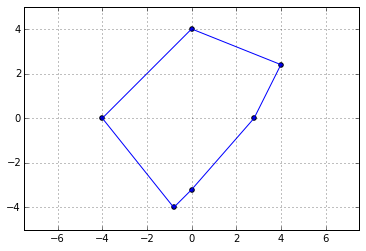

In [5]:
XCoords = np.array([-1,-0.2,0,0.7,1,0])*4
YCoords = np.array([0,-1,-.8,0,.6,1])*4

plt.scatter(XCoords, YCoords)
plt.plot(np.append(XCoords, XCoords[0]), 
         np.append(YCoords, YCoords[0]))
plt.axis("equal")
plt.grid(True)

### Defining the circle fit from example measured factors

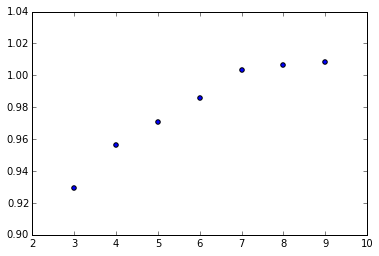

In [6]:
circle_diameter = np.array([3,4,5,6,7,8,9])
circle_factors = np.array([0.9296,0.9562,0.9705,0.9858,1.0032,1.0067,1.0084])

plt.scatter(circle_diameter, circle_factors)

In [7]:
from scipy.interpolate import UnivariateSpline

def circle_fit(radii):
    
    circle_radii = circle_diameter/2
    
    spline = UnivariateSpline(circle_radii, circle_factors)
    results = spline(radii)
    
    results[radii>np.max(circle_radii)] = np.max(circle_factors)
    results[radii<np.min(circle_radii)] = 0
    
    return results

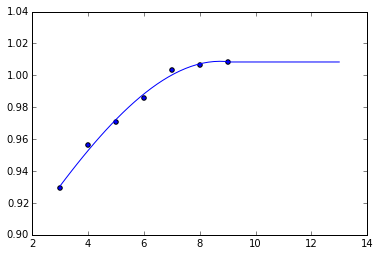

In [8]:
t = np.linspace(circle_diameter.min(),13)
y = circle_fit(t/2)

plt.scatter(circle_diameter, circle_factors)
plt.plot(t,y)

### Finding the equivalent ellipse

In [9]:
equivalentEllipse = EquivalentEllipse(x=XCoords, y=YCoords, circle_fit=circle_fit)

# The ellipse fit method needs to be weighted according to the derivative of `circle_fit`. 
# Width is more important than length.

(-5.0, 5.0, -5.0, 5.0)

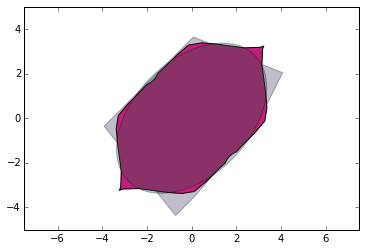

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)

patch = des.PolygonPatch(equivalentEllipse.centredCutout, fc=np.random.uniform(size=3), alpha=0.3)
ax.add_patch(patch)

patch = des.PolygonPatch(equivalentEllipse.straightenedCutout, fc=np.random.uniform(size=3), alpha=1)
ax.add_patch(patch)

patch = des.PolygonPatch(equivalentEllipse.eqEllipse, fc=np.random.uniform(size=3), alpha=0.3)
ax.add_patch(patch)

plt.scatter(0,0)

ax.set_xlim([-equivalentEllipse._Straightened.maxRadii, equivalentEllipse._Straightened.maxRadii])
ax.set_ylim([-equivalentEllipse._Straightened.maxRadii, equivalentEllipse._Straightened.maxRadii])
ax.axis("equal")

## Concepts used to program the equivalent ellipse object

Below is a documentation of the investigative process used to develop the equivalent ellipse object

In [ ]:
exampleFindCentre = find_centre(x=XCoords, y=YCoords, circle_fit=circle_fit)

In [ ]:
straighenedCutout = straighten_cutout(x=XCoords, y=YCoords, centre=exampleFindCentre.centre)

In [ ]:
ellipse_fitting_example = fit_ellipse(x=straighenedCutout.straightenedXCoords, 
                                      y=straighenedCutout.straightenedYCoords)

In [ ]:
ellipse_fitting_example.ellipse

In [ ]:
ellipse_fitting_example.width, ellipse_fitting_example.length